In [2]:
import pydogpack.utils.quadrature as quadrature
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

# Quadrature

## 1D quadrature

### Quadrature Points and Weights

In [2]:
quad_order = 5
tuple_ = quadrature.gauss_pts_and_wgts_1d_canonical(quad_order)
quad_pts = tuple_[0]
quad_wgts = tuple_[1]
print("Quadrature Points")
print(quad_pts)
print("Quadrature Weights")
print(quad_wgts)

Quadrature Points
[-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
Quadrature Weights
[0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]


### Quadrature Example

In [3]:
quad_order = 5
f = lambda x: np.array([np.cos(x), 2.0 * np.cos(x)])
F = lambda x: np.array([np.sin(x), 2.0 * np.sin(x)])
quad_integral = quadrature.gauss_quadrature_1d(f, 1.0, 2.0, quad_order)
exact_integral = F(2.0) - F(1.0)
error = exact_integral - quad_integral
print("Quadrature Result")
print(quad_integral)
print("Exact Integral")
print(exact_integral)
print("Error")
print(error)

Quadrature Result
[0.06782644 0.13565288]
Exact Integral
[0.06782644 0.13565288]
Error
[-2.77555756e-14 -5.55111512e-14]


### Test Quadrature Exactness

Gauss Legendre Quadrature of order n is exact for polynomials of degree 2n - 1 or less

In [4]:
max_quad_order = 5
tolerance = 1e-15
for quad_order in range(1, max_quad_order + 1):
    for degree in range(2 * quad_order):
        f = lambda x: np.power(x, degree)
        F = lambda x: np.power(x, degree + 1) / (degree + 1)
        quad_integral = quadrature.gauss_quadrature_1d_canonical(f, quad_order)
        exact_integral = F(1) - F(-1)
        error = abs(exact_integral - quad_integral)
        assert error <= tolerance

## 2D Quadrature on Rectangles

### Quadrature Points and weights

Quadrature Points
[[-0.90617985 -0.90617985 -0.90617985 -0.90617985 -0.90617985 -0.53846931
  -0.53846931 -0.53846931 -0.53846931 -0.53846931  0.          0.
   0.          0.          0.          0.53846931  0.53846931  0.53846931
   0.53846931  0.53846931  0.90617985  0.90617985  0.90617985  0.90617985
   0.90617985]
 [-0.90617985 -0.53846931  0.          0.53846931  0.90617985 -0.90617985
  -0.53846931  0.          0.53846931  0.90617985 -0.90617985 -0.53846931
   0.          0.53846931  0.90617985 -0.90617985 -0.53846931  0.
   0.53846931  0.90617985 -0.90617985 -0.53846931  0.          0.53846931
   0.90617985]]
Quadrature Weights
[0.05613435 0.1134     0.13478507 0.1134     0.05613435 0.1134
 0.2290854  0.27228653 0.2290854  0.1134     0.13478507 0.27228653
 0.32363457 0.27228653 0.13478507 0.1134     0.2290854  0.27228653
 0.2290854  0.1134     0.05613435 0.1134     0.13478507 0.1134
 0.05613435]


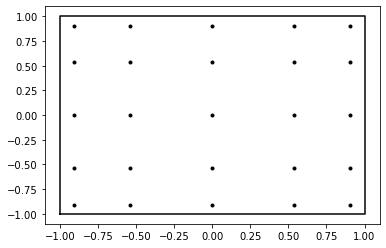

In [4]:
vertices = np.array([[-1, -1], [1, -1], [1, 1], [-1, 1]])
quad_order = 5
tuple_ = quadrature.gauss_pts_and_wgts_2d_square_canonical(quad_order)
quad_pts = tuple_[0]
quad_wgts = tuple_[1]
print("Quadrature Points")
print(quad_pts)
print("Quadrature Weights")
print(quad_wgts)
fig, axes = plt.subplots()
axes.plot(quad_pts[0], quad_pts[1], 'k.')
x = np.append(vertices[:, 0], vertices[0, 0])
y = np.append(vertices[:, 1], vertices[0, 1])
axes.plot(x, y, 'k')

### Quadrature Example

In [7]:
quad_order = 5
x_left = 0.0
x_right = 1.0
y_bottom = 0.0
y_top = 2.0
f = lambda x: np.array([np.cos(x[0]), 2.0 * np.exp(x[1])])
F = lambda x: np.array([np.sin(x[0]) * x[1], 2.0 * np.exp(x[1]) * x[0]])
quad_integral = quadrature.gauss_quadrature_2d(f, x_left, x_right, y_bottom, y_top, quad_order)
exact_integral = (F(np.array([x_right, y_top])) 
    - F(np.array([x_left, y_top])) 
    - F(np.array([x_right, y_bottom])) 
    + F(np.array([x_left, y_bottom])))
error  = abs(exact_integral - quad_integral)
print("Quadrature Result")
print(quad_integral)
print("Exact Integral")
print(exact_integral)
print("Error")
print(error)

Quadrature Result
[ 1.68294197 12.77811219]
Exact Integral
[ 1.68294197 12.7781122 ]
Error
[6.89004409e-13 4.48394744e-09]


### Quadrature Exactness Test

2D Quadrature of order n is exact for all polynomials of degree 2n - 1 or less
n is the number of points in 1 dimension, so there are n^2 total points
In 2D there are n + 1 polynomials of degree n, for example there are 3 polynomials of degree 2, x^2, xy, and y^2

In [8]:
max_quad_order = 5
tolerance = 1e-14
for quad_order in range(1, max_quad_order + 1):
    for degree in range(2 * quad_order):
        for x_degree in range(degree + 1):
            # check all polynomial x^{x_degree} y^{degree - x_degree}
            y_degree = degree - x_degree
            f = lambda x: np.power(x[0], x_degree) * np.power(x[1], y_degree)
            F = lambda x: np.power(x[0], x_degree + 1) / (x_degree + 1) * np.power(x[1], y_degree + 1) / (y_degree + 1)
            quad_integral = quadrature.gauss_quadrature_2d_canonical(f, quad_order)
            exact_integral = F(np.array([1, 1])) - F(np.array([-1, 1])) - F(np.array([1, -1])) + F(np.array([-1, -1]))
            error = abs(exact_integral - quad_integral)
            assert error <= tolerance

## 2D Quadrature on Triangles

## Quadrature Points and Weights

Quadrature Points
[[-0.33333333 -0.05971587 -0.05971587 -0.88056826 -0.79742699 -0.79742699
   0.59485397]
 [-0.33333333 -0.88056826 -0.05971587 -0.05971587  0.59485397 -0.79742699
  -0.79742699]]
Quadrature Weights
[0.45       0.26478831 0.26478831 0.26478831 0.25187836 0.25187836
 0.25187836]


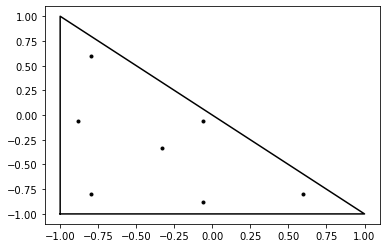

In [20]:
vertices = np.array([[-1, -1], [1, -1], [-1, 1]])
quad_order = 5
tuple_ = quadrature.gauss_pts_and_wgts_2d_triangle_canonical(quad_order)
quad_pts = tuple_[0]
quad_wgts = tuple_[1]
print("Quadrature Points")
print(quad_pts)
print("Quadrature Weights")
print(quad_wgts)
fig, axes = plt.subplots()
axes.plot(quad_pts[0], quad_pts[1], 'k.')
x = np.append(vertices[:, 0], vertices[0, 0])
y = np.append(vertices[:, 1], vertices[0, 1])
axes.plot(x, y, 'k')

## Quadrature Example

In [11]:
quad_order = 6
f = lambda x: np.array([np.cos(x[0]), 2.0 * np.exp(x[1])])
#F = lambda x: np.array([np.sin(x[0]) * x[1], 2.0 * np.exp(x[1]) * x[0]])
quad_integral = quadrature.gauss_quadrature_2d_triangle_canonical(f, quad_order)
# dintt{-1}{1}{\dintt{-1}{-y}{cos{x}}{x}}{y} = 2sin(1)
# dintt{-1}{1}{\dintt{-1}{-x}{2e^y}{y}}{x} = 2e - 6e^-1
exact_integral = np.array([2.0 * np.sin(1.0), 2 * np.exp(1) - 6 * np.exp(-1)])
error  = abs(exact_integral - quad_integral)
print("Quadrature Result")
print(quad_integral)
print("Exact Integral")
print(exact_integral)
print("Error")
print(error)

Quadrature Result
[1.68294182 3.22928729]
Exact Integral
[1.68294197 3.22928701]
Error
[1.51278014e-07 2.80488351e-07]


## Test Quadrature Exactness

Triangular Quadrature can be found for degrees of precision/exactness for any integer and are given in the paper by Dunavant up to polynomials of degree 20. In the discontinous galerkin method quadrature is needed of degree 2n - 2 where n is the spatial order of the method. This is because we have integrals of products of polynomials up to degree (n - 1). For example the mass matrix is computed by integrals of phi_i times phi_j, where phi_i and phi_j are polynomials of degree (n - 1), so the total degree is 2n - 2. For first, second, and third order methods we need quadrature that is exact for polynomials of degree 0, 2, and 4. The quadrature utility is made so that the spatial order of the method is given, and the quadrature of the required precision is returned.

Also we desire quadrature of all positive weights as this provides stability and prevents erroneous negative values from occuring.

Triangular quadrature of order n is exact for polynomials of degree n

In [4]:
max_quad_order = 6
tolerance = 1e-14
for quad_order in range(1, max_quad_order + 1):
    #print("Quad Order")
    #print(quad_order)
    for degree in range(quad_order + 1):
        for x_degree in range(degree + 1):
            # check all polynomial x^{x_degree} y^{degree - x_degree}
            y_degree = degree - x_degree
            f = lambda x: np.power(x[0], x_degree) * np.power(x[1], y_degree)
            quad_integral = quadrature.gauss_quadrature_2d_triangle_canonical(f, quad_order)
            i = x_degree
            j = y_degree
            exact_integral = np.power(-1, j + 1)/(j + 1) * ((1 / (i + j + 2) - 1 / (i + 1)) - (1 / (i + j + 2) * np.power(-1, i + j + 2) - 1 / (i + 1) * np.power(-1, i + 1)))
#             print(quad_integral)
#             print(exact_integral)
            error = abs(exact_integral - quad_integral)
            #print(i)
            #print(j)
            #print(error)
            #if (error > tolerance):
            #    import ipdb; ipdb.set_trace()
            assert error <= tolerance